In [15]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
from datetime import datetime

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii
from matplotlib.colors import LogNorm
import matplotlib.cm as cm

# Import astropy stuff
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle



In [16]:
#IMPORT RECORDS FROM CATALOGUE FILE 

# CatName = "1062_-0p3_pbcor_cat"
# Data = ascii.read("1062_-0p3_pbcor_cat - Copy.csv")

# CatName = "1323_-0p3_pbcor_cat"
# Data = ascii.read("1323_-0p3_pbcor_cat - Copy.csv")

# CatName = "1062_Gaia_2MASS_cross"
# Data = ascii.read("TOPCAT TABLE.csv")

CatName = "All_AEGEAN"
Data = ascii.read("AEGEAN_ALL.csv")

# CatName = "Observation_Candidates"
# Data2 = ascii.read("Below_18th_Mag_GAIA.csv")

# CatName = "1062_SN10_Gaia_2mass"
# Data = ascii.read("1062_SN10_Gaia_2mass.csv")

Cat = CatName[0:4]
ColString = Data.colnames
print("Initial catalog columns :\n",ColString,"\n")



print(len(Data['rms'])," Entries in the list")

print("\"")


Initial catalog columns :
 ['islsrc', 'bkg', 'rms', 'ra_str', 'dec_str', 'ra_deg', 'ra_deg_err', 'dec_deg', 'dec_deg_err', 'peak', 'peak_error', 'S', 'S_err', 'a', 'a_err', 'b', 'b_err', 'pa', 'pa_err', 'flags'] 

10873  Entries in the list
"


In [4]:
#RETIRED CODE SEGMENT!
# This segment creates a txt file with commands to run in UBUNTU to tell DS9 to download optical images from DSS.

# f = open(str(Cat)+'ds9_test_region_file2.reg','w')
f = open(str(Cat)+'DS9_Commands.txt','w')

f.write("ds9")
for i in range(0,5):
    f.write(" -dsssao open -dsssao size 2 2 arcmin -dsssao "+str(Data['ra_str'][i])+" "+str(Data['dec_str'][i])+
            " -save output/"+str(Data['ra_str'][i])+str(Data['dec_str'][i])+".fits -dsssao close")
#     f.write("\n")
f.write(" -exit &")
f.close()

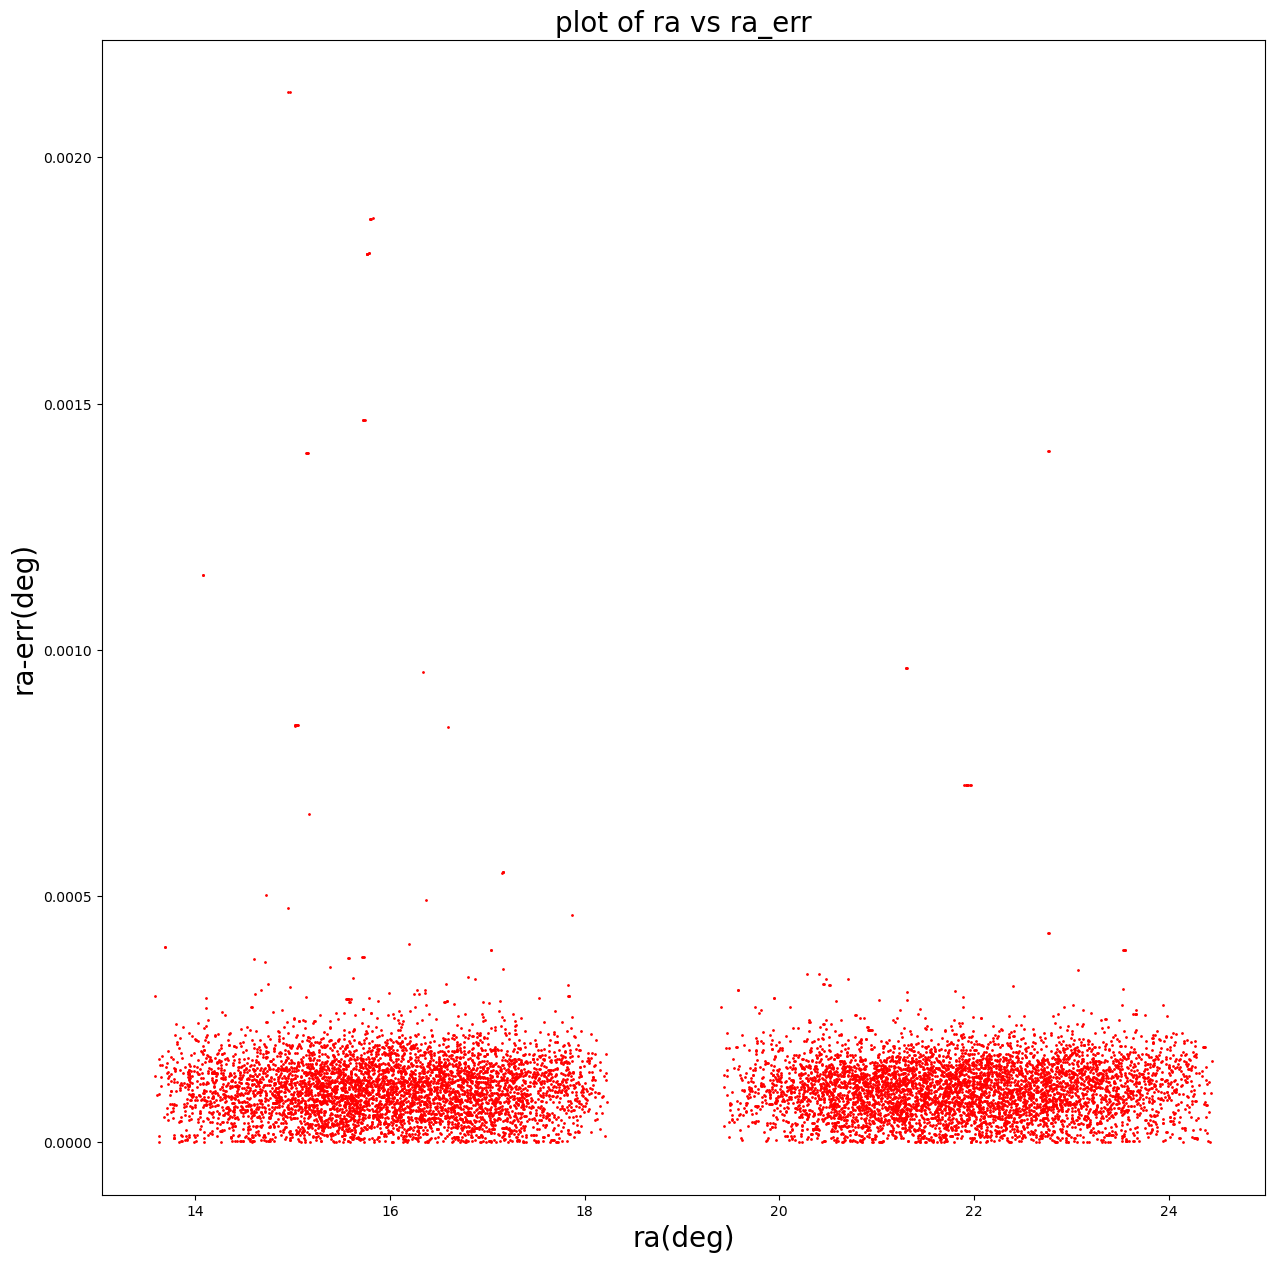

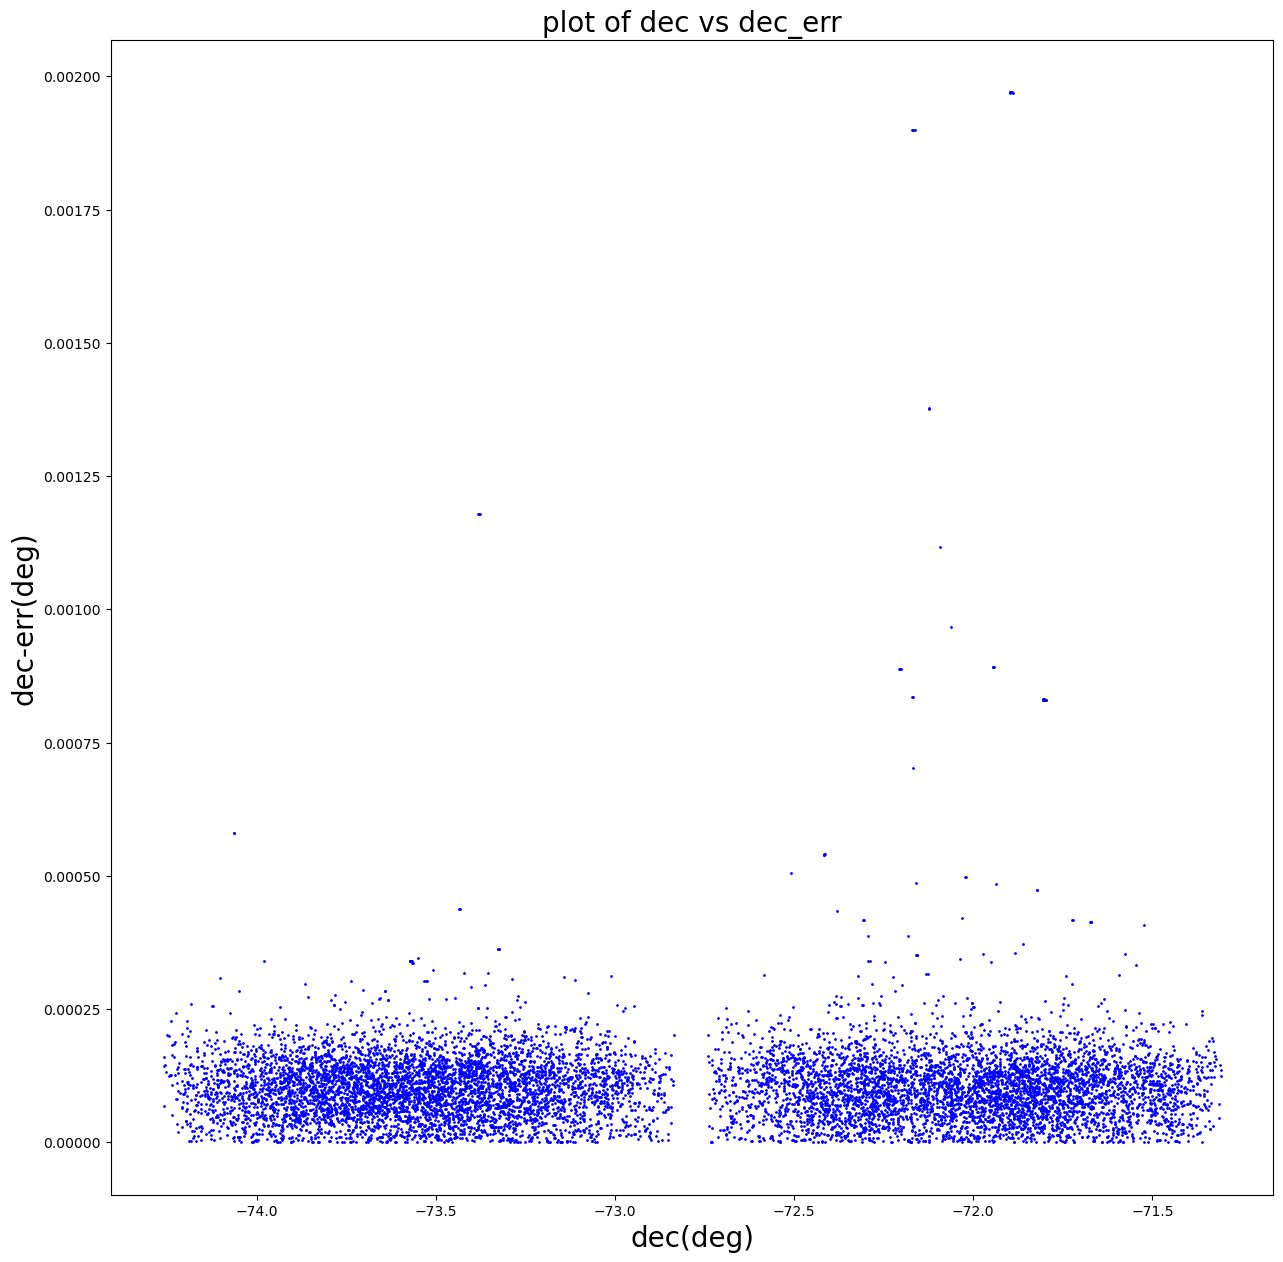

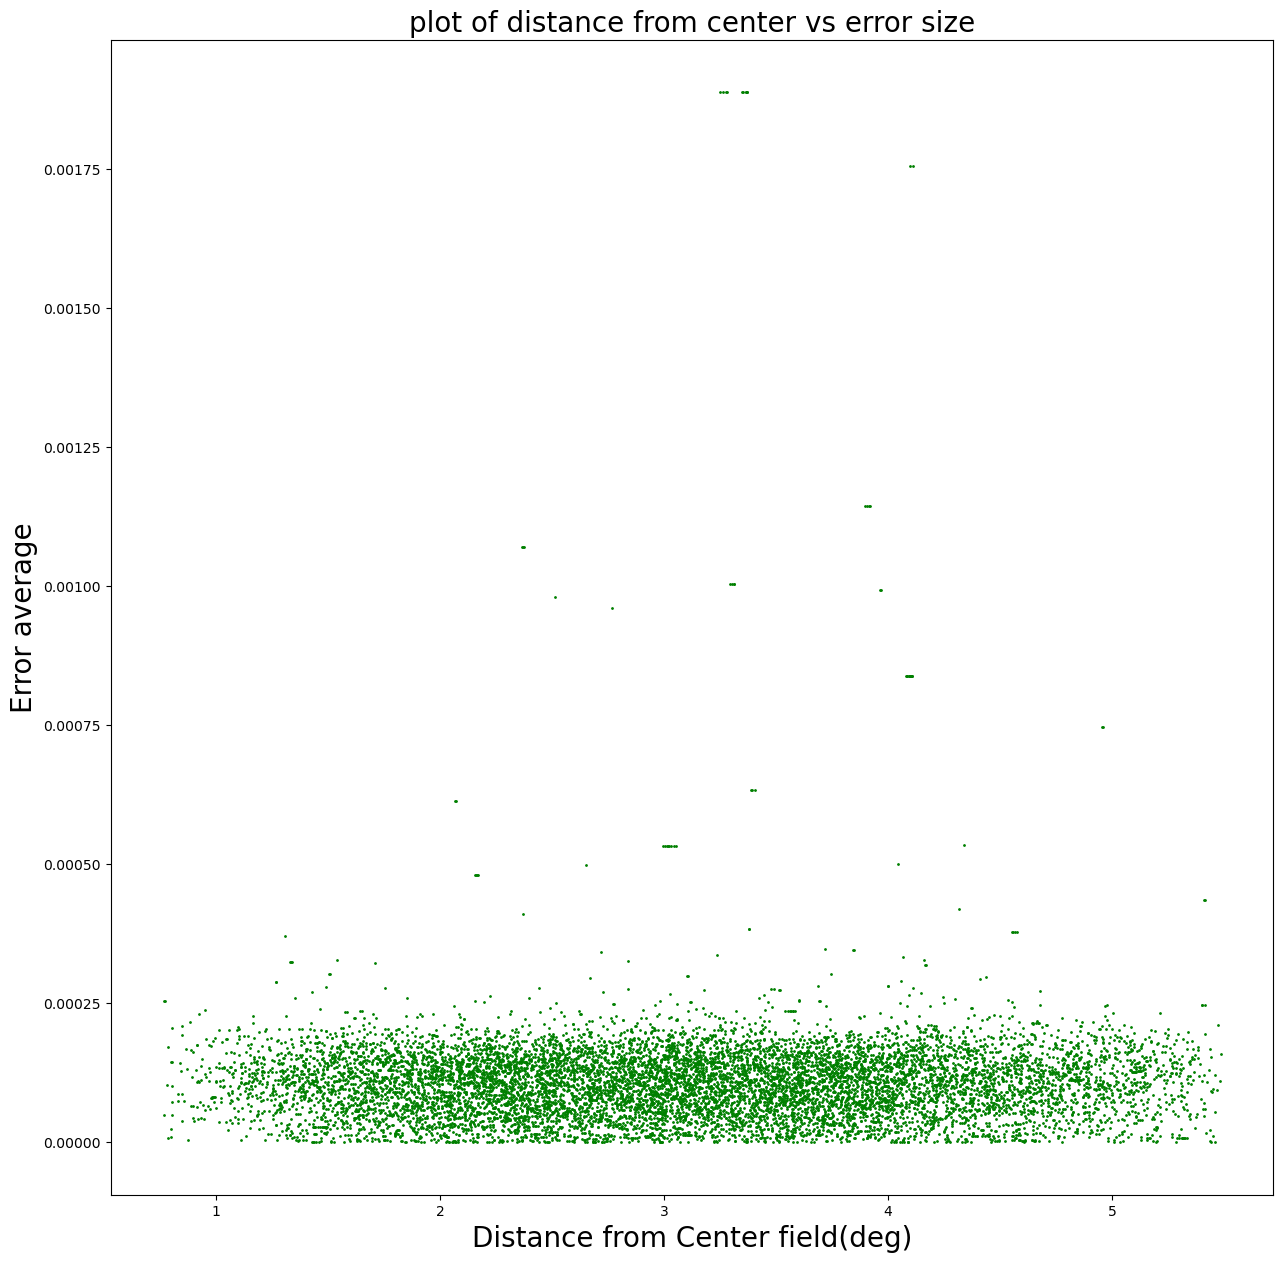

In [6]:
#Visualise the errors in ra and dec based on how far from the centre of the image the sources are:

ra_str = Data['ra_str']
dec_str = Data['dec_str']
ra_deg = Data['ra_deg']
dec_deg = Data['dec_deg']

plt.figure(figsize=(15,15))
plt.title ("plot of ra vs ra_err", fontsize = 20)
plt.ylabel("ra-err(deg)", fontsize = 20)
plt.xlabel("ra(deg)", fontsize = 20)
# plt.xlim(0,max(Total_flux))
# plt.ylim(-0.0000001,0.25)
# plt.xlim(-0.1,1.75)
plt.scatter(ra_deg,Data['ra_deg_err'], s = 1, color = 'red')

plt.figure(figsize=(15,15))
plt.title ("plot of dec vs dec_err", fontsize = 20)
plt.ylabel("dec-err(deg)", fontsize = 20)
plt.xlabel("dec(deg)", fontsize = 20)
# plt.xlim(0,max(Total_flux))
# plt.ylim(-0.0000001,0.25)
# plt.xlim(-0.1,1.75)
plt.scatter(dec_deg,Data['dec_deg_err'], s = 1, color = 'blue')

ra_min = min(Data['ra_deg'])
dec_min = max(Data['dec_deg']) #use max to find the smallest absolute value
ra_deg = ra_deg-ra_min
dec_deg = dec_deg-dec_min
Center_Field_ra = max(ra_deg)/2
Center_Field_dec = min(dec_deg)/2
Distances = np.sqrt((ra_deg-Center_Field_ra)**2+(dec_deg-Center_Field_dec)**2)
errors = (Data['ra_deg_err']+Data['dec_deg_err'])/2

plt.figure(figsize=(15,15))
plt.title ("plot of distance from center vs error size", fontsize = 20)
plt.ylabel("Error average", fontsize = 20)
plt.xlabel("Distance from Center field(deg)", fontsize = 20)
# plt.xlim(0,max(Total_flux))
# plt.ylim(-0.0000001,0.25)
# plt.xlim(-0.1,1.75)
plt.scatter(Distances,errors, s = 1, color = 'green')



(array([1.0458e+04, 1.7700e+02, 6.3000e+01, 2.8000e+01, 2.7000e+01,
        1.7000e+01, 6.0000e+00, 1.4000e+01, 1.0000e+01, 6.0000e+00,
        7.0000e+00, 5.0000e+00, 4.0000e+00, 1.0000e+00, 4.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([3.60000e+00, 6.91800e+01, 1.34760e+02,

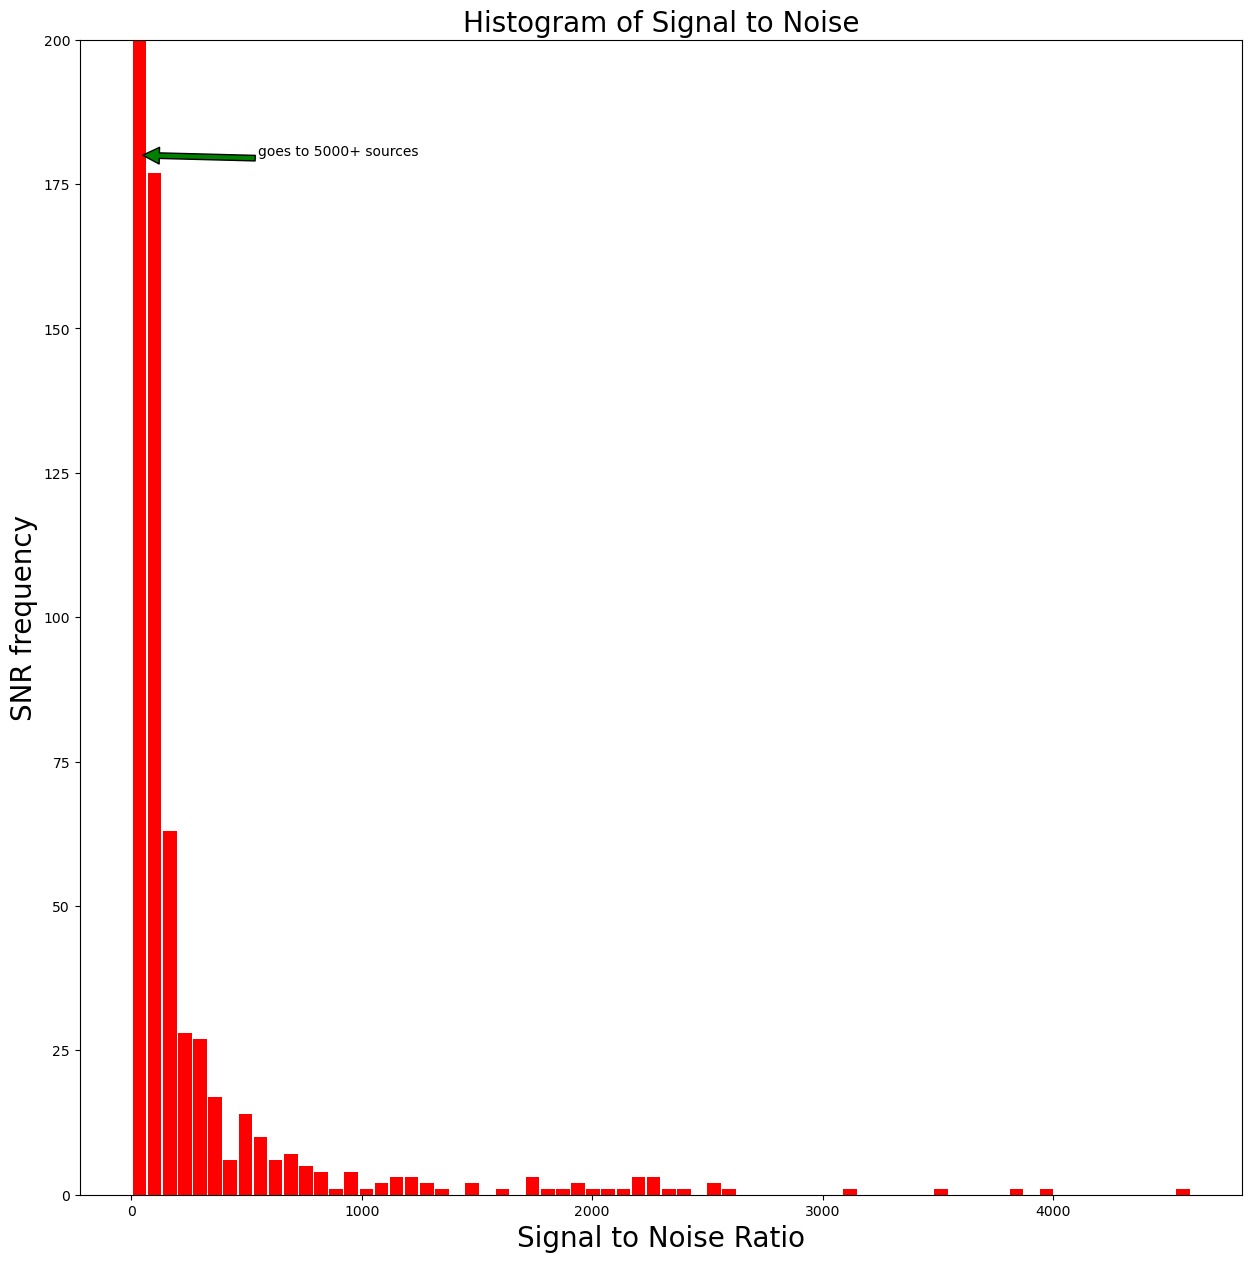

In [7]:
#Histogram of signal to noise values from peak/rms. Higher s/n means the point source is very bright
#in comparison to the background brightness

SNR = Data['peak']/Data['rms']

plt.figure(figsize=(15,15))
plt.title ("Histogram of Signal to Noise", fontsize = 20)
plt.ylabel("SNR frequency", fontsize = 20)
plt.xlabel("Signal to Noise Ratio", fontsize = 20)
plt.ylim(0,200)
plt.annotate('goes to 5000+ sources',(50,180), arrowprops = dict(facecolor ='green',shrink = 1),
             xytext =(550,180))
# plt.xscale = "log"
plt.hist(SNR,bins = 70,rwidth=0.9, linewidth = 1, color = 'red')


In [ ]:
# This segment is to plot locations of point sources on a grid of their ra,dec coordinates, depending on the S/N measure.


plt.figure(figsize=(15,15))
plt.title ("Scatter Plot of locations of all sources", fontsize = 20)
plt.ylabel("dec(deg)", fontsize = 20)
plt.xlabel("ra(deg)", fontsize = 20)
plt.scatter(Data['ra_deg'],Data['dec_deg'], s = 1, color = 'green')

for lev in [10,20,50,100]:
    
    # This segment creates a txt file importable to DS9 as a region list for all point sources with peak/rms >10,20,50,100.
    X = []
    Y = []
    S = []
    # f = open(str(Cat)+'ds9_test_region_file_SN10.reg','w')
    f = open(str(Cat)+'TOPCAT_'+str(lev)+'.reg','w')

    f.write('# Region file format: DS9 version 4.1')
    f.write('\n')
    f.write('global color=blue dashlist=8 3 width=3 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1')
    f.write('\n')
    f.write('fk5')
    f.write('\n')
    for i in range(0,len(Data['ra_str'])): #here an if statement can be added to filter only a few points through
        if (Data['peak'][i]/Data['rms'][i] > lev):
            f.write('ellipse('+str(Data['ra_str'][i])+','+str(Data['dec_str'][i])+','+str(Data['a'][i])+'\",'+str(Data['b'][i])+'\",'+str(Data['pa'][i]+90)+')')
            f.write('\n')
            X.append(Data['ra_deg'][i])
            Y.append(Data['dec_deg'][i])
            S.append(Data['peak'][i]/Data['rms'][i])
    f.close()
    
    #This segment plots the coordinates as ra vs dec
    ra_hms = [Angle(ra, unit="deg").to_string(unit="hour", sep=":",precision=0) for ra in X]
    

    num_labels = 6
#     selected_indices = np.linspace(0, len(X) - 1, num_labels, dtype=int)
    selected_ra_degrees = [min(X), min(X)+2, min(X)+4, min(X)+6, min(X)+8, min(X)+10]
    selected_ra_hms = [Angle(ra, unit="deg").to_string(unit="hour", sep=":",precision=0) for ra in [min(X), min(X)+2, min(X)+4, min(X)+6, min(X)+8, min(X)+10]]
    
#     print(selected_indices)
#     print(selected_ra_degrees)
#     break
    
    coords = SkyCoord(ra=X*u.deg, dec=Y*u.deg) 
    coords2= SkyCoord(ra=Data['ra_deg']*u.deg,dec=Data['dec_deg']*u.deg)
    
    fig, ax = plt.subplots(figsize=(15, 12))
    plt.gca().invert_xaxis()
    ax.scatter(coords2.ra, coords2.dec, color="black", s = 10,label="All sources")
    plt.title ("AEGEAN source locations", fontsize = 25)
    ax.set_ylabel("Declination (Degrees)",fontsize=25)
    ax.set_xlabel("Right Ascension (H:M:S)",fontsize=25)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    ax.set_xticks(selected_ra_degrees)
    ax.set_xticklabels(selected_ra_hms, rotation=45, ha='right')  # Rotate for readability
    
    ax.scatter(coords.ra, coords.dec, color="red", s = 15,label="S/N>"+str(lev))

    plt.legend(fontsize=14)

    plt.grid(True)
    plt.savefig(str(lev)+'_AEGEAN_SOURCES.pdf',dpi=1000)
    print(len(X))


C:\Users\debee\AppData\Local\Temp\ipykernel_6088\4041320357.py:26: RuntimeWarning: divide by zero encountered in true_divide
  if (Data['peak'][i]/Data['rms'][i] > lev):


3800


C:\Users\debee\AppData\Local\Temp\ipykernel_6088\4041320357.py:26: RuntimeWarning: divide by zero encountered in true_divide
  if (Data['peak'][i]/Data['rms'][i] > lev):


1429


C:\Users\debee\AppData\Local\Temp\ipykernel_6088\4041320357.py:26: RuntimeWarning: divide by zero encountered in true_divide
  if (Data['peak'][i]/Data['rms'][i] > lev):


549


C:\Users\debee\AppData\Local\Temp\ipykernel_6088\4041320357.py:26: RuntimeWarning: divide by zero encountered in true_divide
  if (Data['peak'][i]/Data['rms'][i] > lev):


In [6]:
# This segment creates a csv file importable to TOPCAT, filtering rows of sources with peak/rms > lev

lev = 20

# f = open(str(Cat)+'ds9_test_region_file_SN100.reg','w')
f = open(str(Cat)+'TOPCAT_SN_'+str(lev)+'.csv','w')

f.write('#islsrc,bkg,rms,ra_str,dec_str,ra_deg,ra_deg_err,dec_deg,dec_deg_err,peak,peak_error,S,S_err,a,a_err,b,b_err,pa,pa_err,flags')
f.write('\n')

for i in range(0,len(Data['ra_str'])): #here an if statement can be added to filter only a few points through
    if (Data['peak'][i]/Data['rms'][i] > lev):
        for j in range(0,20):
            f.write(str(Data[i][j]))
            if(j!= 19):
                f.write(',')
        f.write('\n')
f.close()


# This segment creates a txt file to use in the SuperCOSMOS Sky Survey website to download optical images


Data = ascii.read(str(Cat)+'TOPCAT_SN_'+str(lev)+'.csv')

# f = open(str(Cat)+'ds9_test_region_file_SN100.reg','w')
f = open(str(Cat)+'SSS.txt','w')

for i in range(0,len(Data['ra_str'])): #here an if statement can be added to filter only a few points through
    f.write(str(Data['ra_str'][i])+','+str(Data['dec_str'][i]))
    f.write('\n')
f.close()

 
print("now =", datetime.now())

now = 2023-05-31 11:36:32.445688


In [2]:
# Rename files
import os

filesRename = []
folder = r"C:\Users\debee\Downloads\Masters 2023\Jupyter notebooks\Region lists and fits image play\1062_SSS_images\1062SSS1_I" #704 last index for SXP1062, 723 for SXP1323
# folder = r"C:\Users\debee\Downloads\Masters 2023\Jupyter notebooks\Region lists and fits image play\1323_SSS_images\1323_SSS_0-250"
for file in os.listdir(folder):
    filesRename.append(file)
    
print(filesRename)

Data = ascii.read("1062TOPCAT_SN_20.csv") #CSV file to read RA,DEC from to add to names. change as needed for specific field

c = 0 #Position to start at in the CSV list
# Iterate
for file in os.listdir(folder):
    print(file)
        
    oldName = os.path.join(folder, file)
    print("oldName: ",oldName)
    n = os.path.splitext(file)[0]
#     print("n: ",n)
    b = str(Data['ra_str'][c])[0:2] +str(Data['ra_str'][c])[3:5] +str(Data['ra_str'][c])[6:8] +str(Data['dec_str'][c])[0:3] +str(Data['dec_str'][c])[4:6] +str(Data['dec_str'][c])[7:9] + '.fits'
#     print("b: ",b)
    newName = os.path.join(folder, b)
    print("newName: ",newName)
    print(c)
    c += 1
    # Rename the file
    os.rename(oldName, newName)
    
res = os.listdir(folder)
print(res)

['00001.fits', '00002.fits', '00003.fits', '00004.fits', '00005.fits', '00006.fits', '00007.fits', '00008.fits', '00009.fits', '00010.fits', '00011.fits', '00012.fits', '00013.fits', '00014.fits', '00015.fits', '00016.fits', '00017.fits', '00018.fits', '00019.fits', '00020.fits', '00021.fits', '00022.fits', '00023.fits', '00024.fits', '00025.fits', '00026.fits', '00027.fits', '00028.fits', '00029.fits', '00030.fits', '00031.fits', '00032.fits', '00033.fits', '00034.fits', '00035.fits', '00036.fits', '00037.fits', '00038.fits', '00039.fits', '00040.fits', '00041.fits', '00042.fits', '00043.fits', '00044.fits', '00045.fits', '00046.fits', '00047.fits', '00048.fits', '00049.fits', '00050.fits', '00051.fits', '00052.fits', '00053.fits', '00054.fits', '00055.fits', '00056.fits', '00057.fits', '00058.fits', '00059.fits', '00060.fits', '00061.fits', '00062.fits', '00063.fits', '00064.fits', '00065.fits', '00066.fits', '00067.fits', '00068.fits', '00069.fits', '00070.fits', '00071.fits', '0007

00170.fits
oldName:  C:\Users\debee\Downloads\Masters 2023\Jupyter notebooks\Region lists and fits image play\1062_SSS_images\1062SSS1_I\00170.fits
newName:  C:\Users\debee\Downloads\Masters 2023\Jupyter notebooks\Region lists and fits image play\1062_SSS_images\1062SSS1_I\013240-734936.fits
169
00171.fits
oldName:  C:\Users\debee\Downloads\Masters 2023\Jupyter notebooks\Region lists and fits image play\1062_SSS_images\1062SSS1_I\00171.fits
newName:  C:\Users\debee\Downloads\Masters 2023\Jupyter notebooks\Region lists and fits image play\1062_SSS_images\1062SSS1_I\013225-734933.fits
170
00172.fits
oldName:  C:\Users\debee\Downloads\Masters 2023\Jupyter notebooks\Region lists and fits image play\1062_SSS_images\1062SSS1_I\00172.fits
newName:  C:\Users\debee\Downloads\Masters 2023\Jupyter notebooks\Region lists and fits image play\1062_SSS_images\1062SSS1_I\012807-734937.fits
171
00173.fits
oldName:  C:\Users\debee\Downloads\Masters 2023\Jupyter notebooks\Region lists and fits image play

# Now for the fits image handling

(10240, 10240)
Filename: img_1558231257_sdp_l0.full_1284.full_pol_wtspec_SXP1062.ms_msmask_pcal_r0p2-MFS-image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (10240, 10240, 1, 1)   float32   


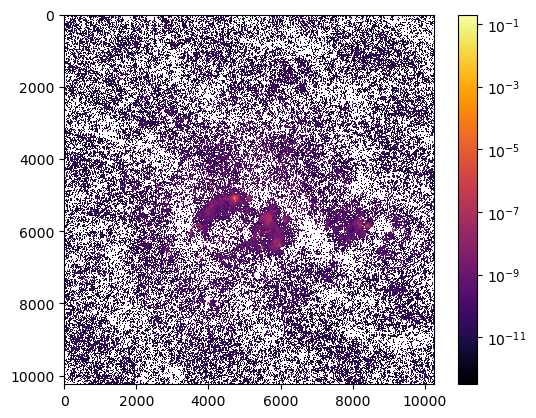

In [66]:
hdu_list = fits.open('img_1558231257_sdp_l0.full_1284.full_pol_wtspec_SXP1062.ms_msmask_pcal_r0p2-MFS-image.fits')
image = hdu_list[0].data
print(image[0][0].shape)
hdu_list.info()


plt.imshow(image[0][0], cmap='inferno')
plt.colorbar() #Normalization issues

original image size:  (357, 357)
img_scale : linear
img_scale : linear
img_scale : linear


<Figure size 640x480 with 0 Axes>

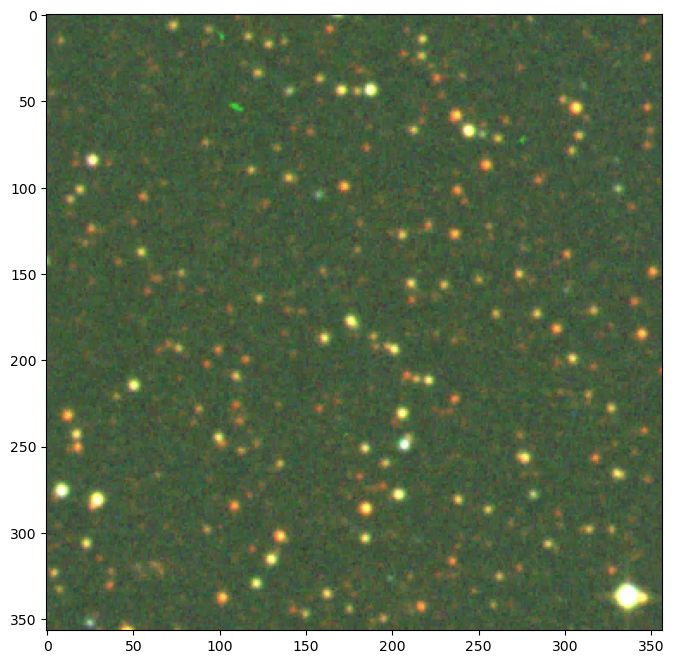

original image size:  (357, 357)
img_scale : linear
img_scale : linear
img_scale : linear


<Figure size 640x480 with 0 Axes>

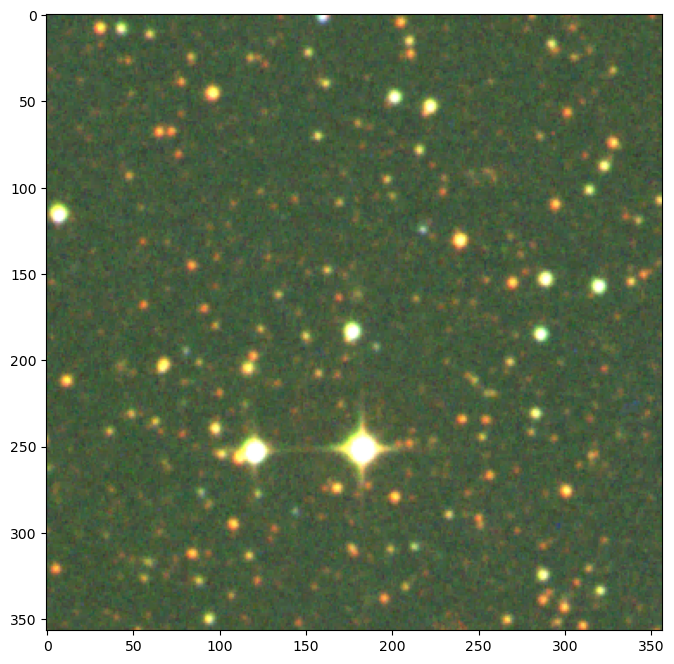

original image size:  (357, 357)
img_scale : linear
img_scale : linear
img_scale : linear


<Figure size 640x480 with 0 Axes>

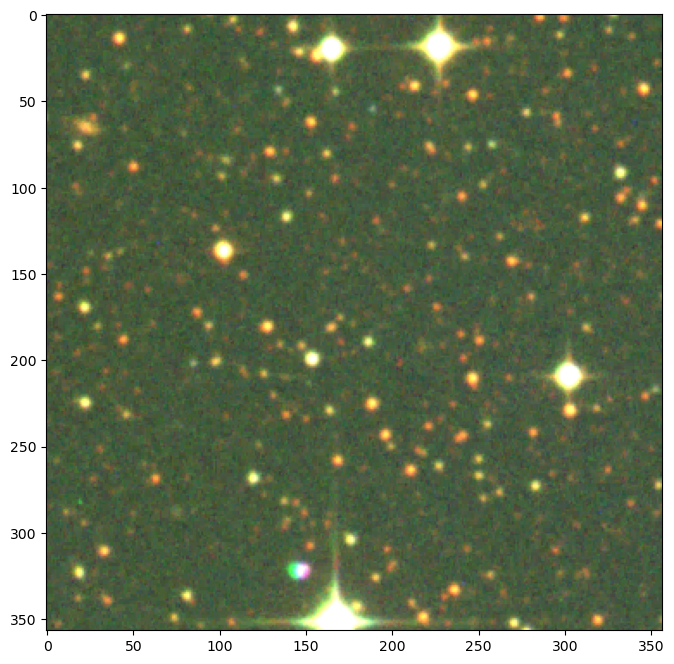

original image size:  (357, 357)
img_scale : linear
img_scale : linear
img_scale : linear


<Figure size 640x480 with 0 Axes>

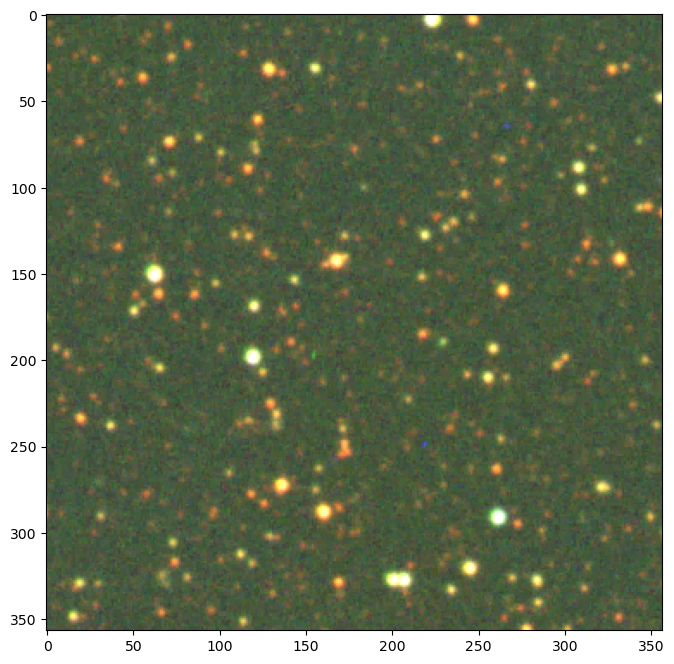

original image size:  (357, 357)
img_scale : linear
img_scale : linear
img_scale : linear


<Figure size 640x480 with 0 Axes>

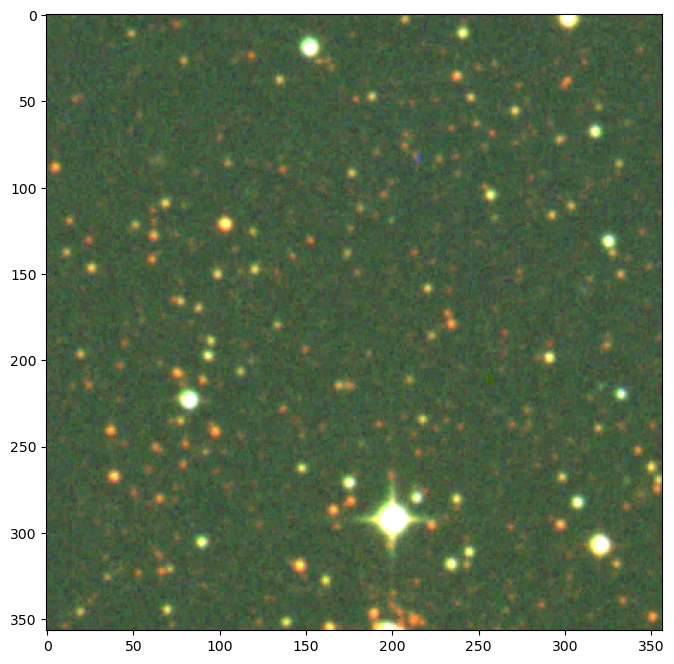

original image size:  (357, 357)
img_scale : linear
img_scale : linear
img_scale : linear


<Figure size 640x480 with 0 Axes>

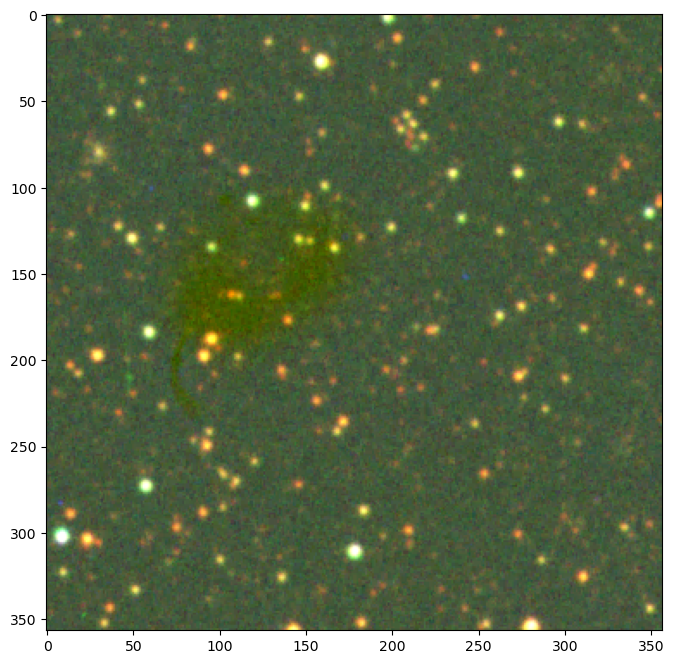

original image size:  (357, 357)
img_scale : linear
img_scale : linear
img_scale : linear


<Figure size 640x480 with 0 Axes>

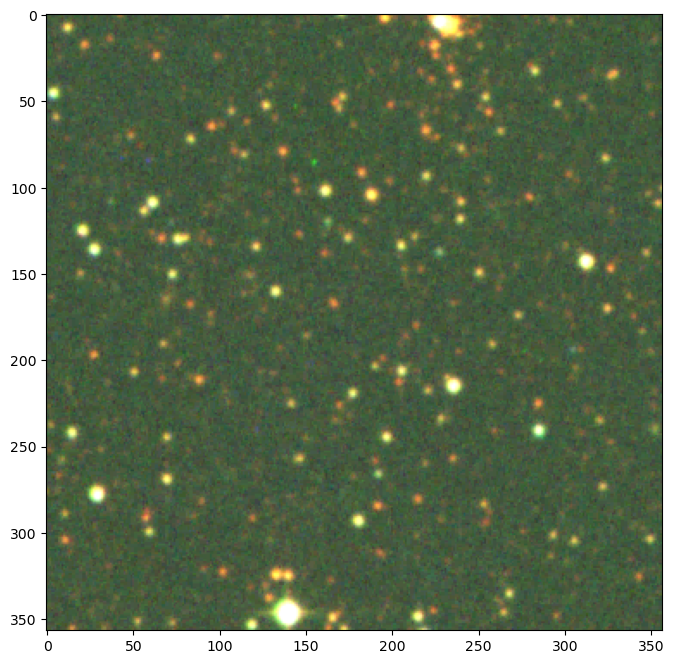

original image size:  (357, 357)
img_scale : linear
img_scale : linear
img_scale : linear


<Figure size 640x480 with 0 Axes>

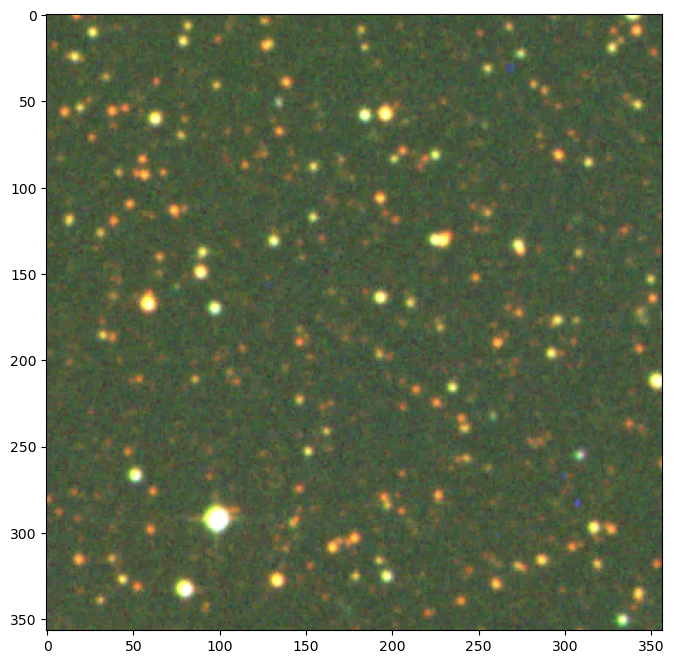

original image size:  (357, 357)
img_scale : linear
img_scale : linear
img_scale : linear


<Figure size 640x480 with 0 Axes>

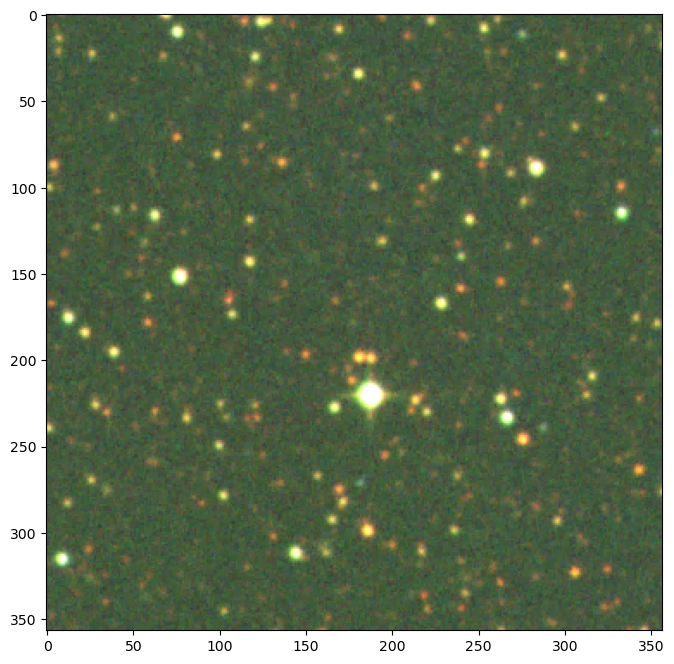

original image size:  (357, 357)
img_scale : linear
img_scale : linear
img_scale : linear


<Figure size 640x480 with 0 Axes>

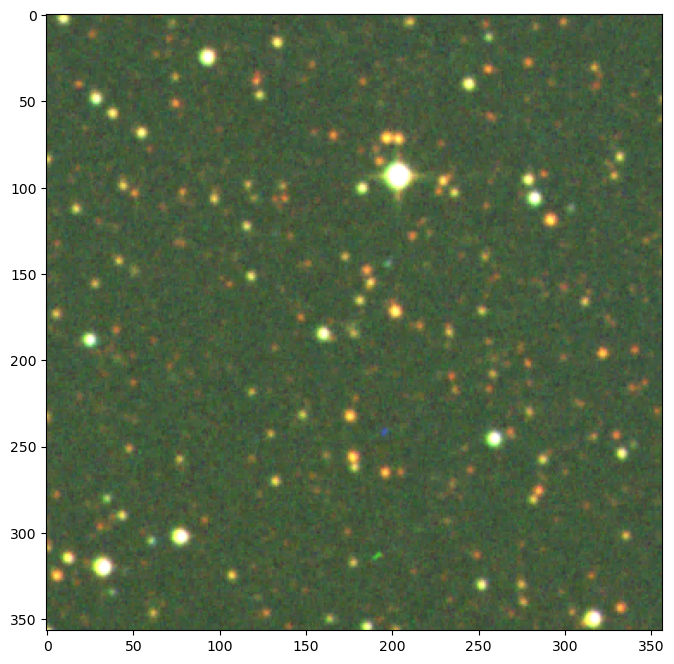

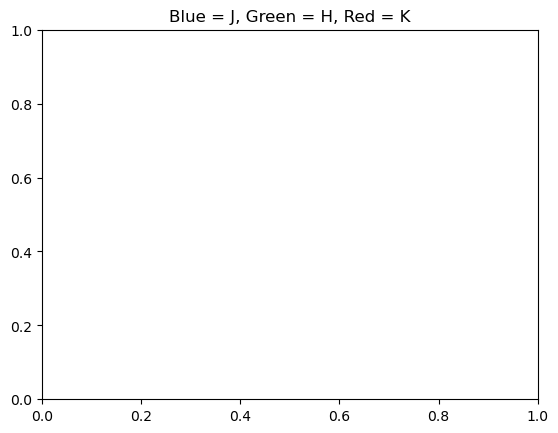

In [36]:
from astropy.io import fits
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import img_scale
import os


folder = r"C:/Users/debee/Downloads/Masters 2023/Jupyter notebooks/Region lists and fits image play/1062_SSS_images/1062SSS1_I" #704 last index
folder2 = r"C:/Users/debee/Downloads/Masters 2023/Jupyter notebooks/Region lists and fits image play/1062_SSS_images"
c =0
for file in os.listdir(folder):
    j_img = fits.open(str(folder2+'/1062SSS1_I/'+file))
    j_img = j_img[0].data
    print("original image size: ",j_img.shape)
    h_img = fits.open(str(folder2+'/1062SSS1_R/'+file))
    h_img = h_img[0].data
    k_img = fits.open(str(folder2+'/1062SSS1_B/'+file))
    k_img = k_img[0].data

    img = np.zeros((j_img.shape[0], j_img.shape[1], 3), dtype=float)
    img[:,:,0] = img_scale.linear(k_img, scale_min=0, scale_max=15000)
    img[:,:,1] = img_scale.linear(h_img, scale_min=0, scale_max=15000)
    img[:,:,2] = img_scale.linear(j_img, scale_min=0, scale_max=15000)

    py.clf()
#     py.imshow(img, aspect='equal')
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.show()
    py.title('Blue = J, Green = H, Red = K')
#     py.savefig('my_rgb_image.png')
    c+=1
    if c>=10:
        break